<a href="https://colab.research.google.com/github/MohamedWael45/RFM/blob/main/RFM_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [122]:
import random
import numpy as np
import pandas as pd
import os
from sklearn.cluster import KMeans
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
url="https://raw.githubusercontent.com/MohamedWael45/RFM/main/RFMwithExcel.xlsx"
df=pd.read_excel(url)

In [77]:
df_second_page = pd.read_excel(url, sheet_name="Customer RFM Analysis")
df_second_page.head()

,NOTE - The original Recency calculation was incorrect. This worksheet has the corrected calculation.,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,CustomerID,MostRecentOrderDate,DaysSinceLastOrder,SalesOrderCount,TotalSalesAmount,Recency,Frequency,Monetary
2,11000,2013-05-03 00:00:00,288,3,8248.99,2,9,9
3,11001,2013-12-10 00:00:00,67,3,6383.88,8,9,9
4,11002,2013-02-23 00:00:00,357,3,8114.04,0,9,9


In [78]:
df_second_page = df_second_page.dropna()
df_second_page.head()

,NOTE - The original Recency calculation was incorrect. This worksheet has the corrected calculation.,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
1,CustomerID,MostRecentOrderDate,DaysSinceLastOrder,SalesOrderCount,TotalSalesAmount,Recency,Frequency,Monetary
2,11000,2013-05-03 00:00:00,288,3,8248.99,2,9,9
3,11001,2013-12-10 00:00:00,67,3,6383.88,8,9,9
4,11002,2013-02-23 00:00:00,357,3,8114.04,0,9,9
5,11003,2013-05-10 00:00:00,281,3,8139.29,2,9,9


In [79]:
column_names = df_second_page.columns.tolist()
print("Column Names:")
for column_name in column_names:
    print(column_name)

Column Names:
NOTE - The original Recency calculation was incorrect. This worksheet has the corrected calculation.
Unnamed: 1
Unnamed: 2
Unnamed: 3
Unnamed: 4
Unnamed: 5
Unnamed: 6
Unnamed: 7


In [80]:
new_column_names = [
    "CustomerID", "MostRecentOrderDate", "DaysSinceLastOrder",
    "SalesOrderCount", "TotalSalesAmount", "Recency", "Frequency", "Monetary"]
df_second_page.columns = new_column_names
df_second_page.head()

,CustomerID,MostRecentOrderDate,DaysSinceLastOrder,SalesOrderCount,TotalSalesAmount,Recency,Frequency,Monetary
1,CustomerID,MostRecentOrderDate,DaysSinceLastOrder,SalesOrderCount,TotalSalesAmount,Recency,Frequency,Monetary
2,11000,2013-05-03 00:00:00,288,3,8248.99,2,9,9
3,11001,2013-12-10 00:00:00,67,3,6383.88,8,9,9
4,11002,2013-02-23 00:00:00,357,3,8114.04,0,9,9
5,11003,2013-05-10 00:00:00,281,3,8139.29,2,9,9


In [147]:
df = df.drop(df.index[0])
df_second_page.head()

,CustomerID,MostRecentOrderDate,DaysSinceLastOrder,SalesOrderCount,TotalSalesAmount,Recency,Frequency,Monetary,R2,F2,M2,Cluster
420,11418,2013-12-17 00:00:00,60,1,40,9,0,1,1,1,1,0
2799,13797,2013-12-30 00:00:00,47,1,7,9,0,0,1,1,1,0
2806,13804,2013-12-31 00:00:00,46,1,27,9,0,1,1,1,1,0
4062,15060,2013-12-29 00:00:00,48,1,25,9,0,1,1,1,1,0
5770,16768,2014-01-20 00:00:00,26,1,5,9,0,0,1,1,1,0


In [146]:
df_second_page['DaysSinceLastOrder'] = pd.to_numeric(df_second_page['DaysSinceLastOrder'], errors='coerce')
# Round and convert 'TotalSalesAmount' column to integers

df_second_page['TotalSalesAmount'] = df_second_page['TotalSalesAmount'].apply(lambda x: int(round(x)))



#df_second_page['TotalSalesAmount'] = df_second_page['TotalSalesAmount'].round().astype(int)


try:
  df_second_page['SalesOrderCount'] = pd.to_numeric(df_second_page['SalesOrderCount'], errors='coerce')
except ValueError:
  print("Warning: 'SalesOrderCount' column contains non-numeric values and cannot be converted to int.")


print(df_second_page.dtypes)



CustomerID             object
MostRecentOrderDate    object
DaysSinceLastOrder      int64
SalesOrderCount         int64
TotalSalesAmount        int64
Recency                object
Frequency              object
Monetary               object
R2                      int64
F2                      int64
M2                      int64
Cluster                 int32
dtype: object


In [95]:
def assign_score(value):
    if value >= 0.8:
        return 5
    elif value >= 0.6:
        return 4
    elif value >= 0.4:
        return 3
    elif value >= 0.2:
        return 2
    else:
        return 1

# Apply pd.qcut to bin values into percentile ranges and assign scores
for col in ['DaysSinceLastOrder','SalesOrderCount', 'TotalSalesAmount']:
    min_val = df_second_page[col].min()
    max_val = df_second_page[col].max()
    scaled_values = (df_second_page[col] - min_val) / (max_val - min_val)  # Perform min-max scaling
    percentiles = pd.qcut(df_second_page[col], 5, labels=False, duplicates='drop')  # Compute percentiles
    scores = percentiles.apply(lambda x: assign_score(x / 5))  # Map percentiles to scores
    df_second_page[col + '_score'] = scores  # Assign scores to new column

# Rename the new columns
df_second_page.rename(columns={'DaysSinceLastOrder_score': 'R2', 'SalesOrderCount_score': 'F2', 'TotalSalesAmount_score': 'M2'}, inplace=True)

# Find duplicated column names
duplicated_columns = df_second_page.columns[df_second_page.columns.duplicated()]
df_second_page.drop(columns=duplicated_columns, inplace=True)

print(df_second_page)





      CustomerID  MostRecentOrderDate  DaysSinceLastOrder  SalesOrderCount  \
2          11000  2013-05-03 00:00:00                 288                3   
3          11001  2013-12-10 00:00:00                  67                3   
4          11002  2013-02-23 00:00:00                 357                3   
5          11003  2013-05-10 00:00:00                 281                3   
6          11004  2013-05-01 00:00:00                 290                3   
...          ...                  ...                 ...              ...   
18481      29479  2012-09-04 00:00:00                 529                1   
18482      29480  2013-07-17 00:00:00                 213                1   
18483      29481  2011-08-13 00:00:00                 917                1   
18484      29482  2012-09-18 00:00:00                 515                1   
18485      29483  2012-09-09 00:00:00                 524                1   

       TotalSalesAmount Recency Frequency Monetary  R2  F2  M2 

In [110]:
max_r2 = df_second_page['R2'].max()
max_f2 = df_second_page['F2'].max()
max_m2 = df_second_page['M2'].max()
print("Max value of R2:", max_r2)
print("Max value of M2:", max_m2)
print("Max value of F2:", max_f2)
data_type_f2 = df_second_page['F2'].dtype

# Subtract 3 from the value if it's 8 in the "F2" column
df_second_page['F2'] = df_second_page['F2'].apply(lambda x: x - 3 if x == 8 else (x - 1 if x == 6 else (x + 2 if x == -1 else (x - 2 if x == 7 else (x + 1 if x == 0 else x)))))



# Print the updated DataFrame
print(df_second_page)


Max value of R2: 5
Max value of M2: 5
Max value of F2: 5
      CustomerID  MostRecentOrderDate  DaysSinceLastOrder  SalesOrderCount  \
420        11418  2013-12-17 00:00:00                  60                1   
2799       13797  2013-12-30 00:00:00                  47                1   
2806       13804  2013-12-31 00:00:00                  46                1   
4062       15060  2013-12-29 00:00:00                  48                1   
5770       16768  2014-01-20 00:00:00                  26                1   
...          ...                  ...                 ...              ...   
18336      29334  2011-08-14 00:00:00                 916                1   
18450      29448  2011-05-01 00:00:00                1021                1   
328        11326  2013-02-20 00:00:00                 360                2   
2797       13795  2013-03-03 00:00:00                 349                2   
18200      29198  2011-07-17 00:00:00                 944                1   

      

In [111]:
df_second_page.sort_values(by=['R2', 'F2', 'M2'], ascending=True, inplace=True)

# Print the sorted DataFrame
print(df_second_page)

      CustomerID  MostRecentOrderDate  DaysSinceLastOrder  SalesOrderCount  \
420        11418  2013-12-17 00:00:00                  60                1   
2799       13797  2013-12-30 00:00:00                  47                1   
2806       13804  2013-12-31 00:00:00                  46                1   
4062       15060  2013-12-29 00:00:00                  48                1   
5770       16768  2014-01-20 00:00:00                  26                1   
...          ...                  ...                 ...              ...   
18336      29334  2011-08-14 00:00:00                 916                1   
18450      29448  2011-05-01 00:00:00                1021                1   
328        11326  2013-02-20 00:00:00                 360                2   
2797       13795  2013-03-03 00:00:00                 349                2   
18200      29198  2011-07-17 00:00:00                 944                1   

       TotalSalesAmount Recency Frequency Monetary  R2  F2  M2 

Cluster labels: [0 0 0 ... 1 1 1]


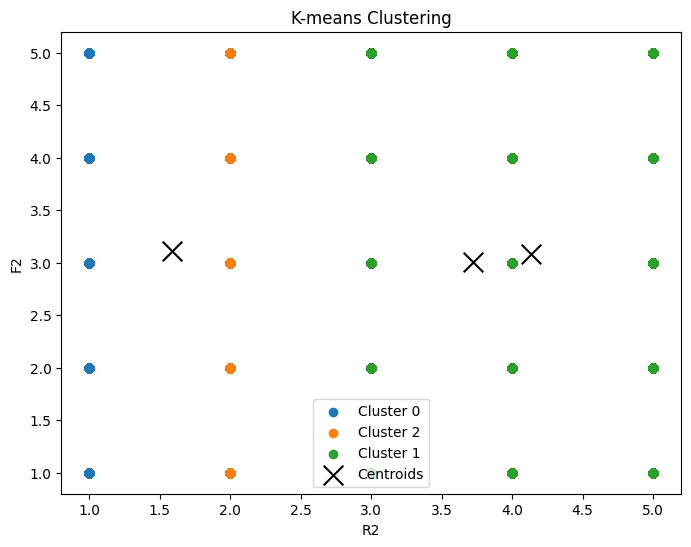

"X = df_second_page[['R2', 'F2', 'M2']]\ninitial_centroids = X.median().values.reshape(1, -1)\nkmeans = KMeans(n_clusters=10, init='k-means++', n_init=1, max_iter=4, random_state=42)\nkmeans.fit(X)\nlabels = kmeans.labels_\nfig = plt.figure(figsize=(8, 6))\nax = fig.add_subplot(111, projection='3d')\nax.scatter(X['R2'], X['F2'], X['M2'], c=labels.astype(np.float64), edgecolor='k')\n\nax.set_xlabel('R2')\nax.set_ylabel('F2')\nax.set_zlabel('M2')\nplt.title('K-Means Clustering')\nplt.show()"

In [145]:
median_R2 = df_second_page['R2'].median()
median_F2 = df_second_page['F2'].median()
median_M2 = df_second_page['M2'].median()

# Create initial centroids as the medians of each column
initial_centroids = np.array([[median_R2, median_F2, median_M2]])

# Define the number of clusters (k)
k = 3  # Change this to the desired number of segments

# Repeat median calculation k-1 times to get k initial centroids
for _ in range(k-1):
    median_R2 = df_second_page['R2'].median()
    median_F2 = df_second_page['F2'].median()
    median_M2 = df_second_page['M2'].median()
    initial_centroids = np.append(initial_centroids, [[median_R2, median_F2, median_M2]], axis=0)

# Perform K-means clustering with the initial centroids
kmeans = KMeans(n_clusters=k, init=initial_centroids, n_init=1)
kmeans.fit(df_second_page[['R2', 'F2', 'M2']])

# Print the cluster labels
print("Cluster labels:", kmeans.labels_)


df_second_page['Cluster'] = kmeans.labels_

# Visualize the clusters
plt.figure(figsize=(8, 6))

# Scatter plot for each cluster
for cluster in df_second_page['Cluster'].unique():
    plt.scatter(df_second_page[df_second_page['Cluster'] == cluster]['R2'],
                df_second_page[df_second_page['Cluster'] == cluster]['F2'],
                label=f'Cluster {cluster}')

# Plot the centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='x', s=200, c='black', label='Centroids')
plt.xlabel('R2')
plt.ylabel('F2')
plt.title('K-means Clustering')
plt.legend()
plt.show()

'''X = df_second_page[['R2', 'F2', 'M2']]
initial_centroids = X.median().values.reshape(1, -1)
kmeans = KMeans(n_clusters=10, init='k-means++', n_init=1, max_iter=4, random_state=42)
kmeans.fit(X)
labels = kmeans.labels_
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X['R2'], X['F2'], X['M2'], c=labels.astype(np.float64), edgecolor='k')

ax.set_xlabel('R2')
ax.set_ylabel('F2')
ax.set_zlabel('M2')
plt.title('K-Means Clustering')
plt.show()'''